In [1]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Importing the training set
dataset= pd.read_csv("Datasets/covid_stocks_with_covid_data.csv")

In [2]:
dataset.head()

,pandemic_date,daily_new_cases,daily_new_deaths,stock_ticker,open_price,highest,lowest,closing,Trading_Volume,Volume_Weighted_Average_Price,Number_of_Transactions
0,2020-03-11,307.0,8.0,PFE,30.48,32.000,30.00,30.02,60585686.0,30.6586,307447.0
1,2020-03-12,1174.0,4.0,PFE,31.27,32.880,30.23,32.71,58156515.0,31.4335,313654.0
2,2020-03-15,1046.0,17.0,PFE,29.94,32.285,29.65,30.18,48333517.0,30.9841,270185.0
3,2020-03-16,1336.0,21.0,PFE,31.64,32.650,30.59,32.16,52139745.0,31.6114,317412.0
4,2020-03-17,2442.0,25.0,PFE,30.77,32.610,30.31,32.36,42228311.0,31.6159,249462.0


In [3]:
dataset['pandemic_date'] =  pd.to_datetime(dataset['pandemic_date'], infer_datetime_format=True)

In [4]:
dataset_train = dataset[dataset["pandemic_date"].isin(pd.date_range("2020-03-11", "2020-12-30"))]
dataset_train_m = dataset_train[dataset_train['stock_ticker']=='MRNA']
dataset_train_m

,pandemic_date,daily_new_cases,daily_new_deaths,stock_ticker,open_price,highest,lowest,closing,Trading_Volume,Volume_Weighted_Average_Price,Number_of_Transactions
1371,2020-03-11,307.0,8.0,MRNA,22.8997,24.2800,21.9000,22.30,11305347.0,22.9997,70915.0
1372,2020-03-12,1174.0,4.0,MRNA,23.0000,23.4700,19.3100,21.30,11853052.0,21.0470,82944.0
1373,2020-03-15,1046.0,17.0,MRNA,23.7600,27.8000,22.2200,26.49,39850785.0,25.7404,249726.0
1374,2020-03-16,1336.0,21.0,MRNA,29.3600,32.7000,27.3148,28.18,44484144.0,29.9634,282956.0
1375,2020-03-17,2442.0,25.0,MRNA,27.1300,32.5400,26.5500,31.58,28702290.0,30.7496,201241.0
...,...,...,...,...,...,...,...,...,...,...,...
17534,2020-12-23,232340.0,3411.0,MRNA,125.9400,129.7000,122.7201,123.39,12720588.0,124.9976,124137.0
17535,2020-12-27,150278.0,1584.0,MRNA,120.0400,122.8800,111.0500,111.40,31088166.0,115.5921,332671.0
17536,2020-12-28,185422.0,2374.0,MRNA,107.7957,116.2500,106.8800,114.39,23718799.0,113.2451,227932.0
17537,2020-12-29,207215.0,3801.0,MRNA,118.4000,118.9408,108.8000,111.13,23965535.0,112.4531,221173.0


In [5]:
training_set = dataset_train_m.iloc[:, [7]].values
training_set

array([[ 22.3 ],
       [ 21.3 ],
       [ 26.49],
       ...,
       [114.39],
       [111.13],
       [104.47]])

In [6]:
# Feature Scaling
# Use Normalization (versus Standardization) for RNNs with Sigmoid Activation Functions
# 'MinMaxScalar' is a Normalization Library
from sklearn.preprocessing import MinMaxScaler
# 'feature_range = (0,1)' makes sure that training data is scaled to have values between 0 and 1
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.00673129],
       [0.        ],
       [0.03493538],
       ...,
       [0.62661551],
       [0.60467151],
       [0.55984114]])

In [7]:
training_set_scaled.shape

(1640, 1)

In [24]:
# Creating a data structure with 60 timesteps (look back 60 days) and 1 output
# This tells the RNN what to remember (Number of timesteps) when predicting the next Stock Price
# The wrong number of timesteps can lead to Overfitting or bogus results
# 'x_train' Input with 60 previous days' stock prices
X_train = []
#X_train=training_set_scaled
# 'y_train' Output with next day's stock price
y_train = []
for i in range(60, 1640):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
#y_train=dataset_tarin_m.iloc[:, [7]].values
X_train, y_train = np.array(X_train), np.array(y_train)

In [25]:
X_train

array([[0.00673129, 0.        , 0.03493538, ..., 0.25976037, 0.26447227,
        0.24831718],
       [0.        , 0.03493538, 0.04631125, ..., 0.26447227, 0.24831718,
        0.25444265],
       [0.03493538, 0.04631125, 0.06919763, ..., 0.24831718, 0.25444265,
        0.24858643],
       ...,
       [0.31980345, 0.34093969, 0.33481422, ..., 0.73397954, 0.68719709,
        0.60648896],
       [0.34093969, 0.33481422, 0.34376683, ..., 0.68719709, 0.60648896,
        0.62661551],
       [0.33481422, 0.34376683, 0.34753635, ..., 0.60648896, 0.62661551,
        0.60467151]])

In [26]:
X_train.shape

(1580, 60)

In [27]:
y_train

array([0.25444265, 0.24858643, 0.260972  , ..., 0.62661551, 0.60467151,
       0.55984114])

In [28]:
y_train=y_train.reshape((-1,1))
y_train

array([[0.25444265],
       [0.24858643],
       [0.260972  ],
       ...,
       [0.62661551],
       [0.60467151],
       [0.55984114]])

In [29]:
# Reshaping (add more dimensions)
# This lets you add more indicators that may potentially have corelation with Stock Prices
# Keras RNNs expects an input shape (Batch Size, Timesteps, input_dim)
# '.shape[0]' is the number of Rows (Batch Size)
# '.shape[1]' is the number of Columns (timesteps)
# 'input_dim' is the number of factors that may affect stock prices
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Show the dataset we're working with
display(X_train)

array([[[0.00673129],
        [0.        ],
        [0.03493538],
        ...,
        [0.25976037],
        [0.26447227],
        [0.24831718]],

       [[0.        ],
        [0.03493538],
        [0.04631125],
        ...,
        [0.26447227],
        [0.24831718],
        [0.25444265]],

       [[0.03493538],
        [0.04631125],
        [0.06919763],
        ...,
        [0.24831718],
        [0.25444265],
        [0.24858643]],

       ...,

       [[0.31980345],
        [0.34093969],
        [0.33481422],
        ...,
        [0.73397954],
        [0.68719709],
        [0.60648896]],

       [[0.34093969],
        [0.33481422],
        [0.34376683],
        ...,
        [0.68719709],
        [0.60648896],
        [0.62661551]],

       [[0.33481422],
        [0.34376683],
        [0.34753635],
        ...,
        [0.60648896],
        [0.62661551],
        [0.60467151]]])

In [30]:
X_train.shape

(1580, 60, 1)

In [31]:
# Part 2 - Building the RNN
# Building a robust stacked LSTM with dropout regularization

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [32]:
# Initialising the RNN
# Regression is when you predict a continuous value
regressor = Sequential()

In [33]:
# Adding the first LSTM layer and some Dropout regularisation
# 'units' is the number of LSTM Memory Cells (Neurons) for higher dimensionality
# 'return_sequences = True' because we will add more stacked LSTM Layers
# 'input_shape' of x_train
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# 20% of Neurons will be ignored (10 out of 50 Neurons) to prevent Overfitting
regressor.add(Dropout(0.2))

In [34]:
# Adding a second LSTM layer and some Dropout regularisation
# Not need to specify input_shape for second Layer, it knows that we have 50 Neurons from the previous layer
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
# This is the last LSTM Layer. 'return_sequences = false' by default so we leave it out.
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [35]:
# Adding the output layer
# 'units = 1' because Output layer has one dimension
regressor.add(Dense(units = 1))

# Compiling the RNN
# Keras documentation recommends 'RMSprop' as a good optimizer for RNNs
# Trial and error suggests that 'adam' optimizer is a good choice
# loss = 'mean_squared_error' which is good for Regression vs. 'Binary Cross Entropy' previously used for Classification
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
# 'X_train' Independent variables
# 'y_train' Output Truths that we compare X_train to.
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
50/50 [==============================] - 10s 64ms/step - loss: 0.0423
Epoch 2/100
50/50 [==============================] - 3s 68ms/step - loss: 0.0135
Epoch 3/100
50/50 [==============================] - 3s 65ms/step - loss: 0.0103
Epoch 4/100
50/50 [==============================] - 3s 63ms/step - loss: 0.0101
Epoch 5/100
50/50 [==============================] - 3s 57ms/step - loss: 0.0096
Epoch 6/100
50/50 [==============================] - 3s 61ms/step - loss: 0.0092
Epoch 7/100
50/50 [==============================] - 3s 56ms/step - loss: 0.0087
Epoch 8/100
50/50 [==============================] - 3s 55ms/step - loss: 0.0076
Epoch 9/100
50/50 [==============================] - 3s 58ms/step - loss: 0.0071
Epoch 10/100
50/50 [==============================] - 3s 57ms/step - loss: 0.0077
Epoch 11/100
50/50 [==============================] - 3s 58ms/step - loss: 0.0068
Epoch 12/100
50/50 [==============================] - 3s 60ms/step - loss: 0.0062
Epoch 13/100
50/50 [====

In [79]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2021

dataset_test = dataset[dataset["pandemic_date"].isin(pd.date_range("2021-01-01", "2021-12-30"))]
dataset_test_m = dataset_test[dataset_test['stock_ticker']=='MRNA']

test_set = dataset_test_m.iloc[:, [7]].values
test_set

array([[111.73],
       [109.18],
       [116.26],
       ...,
       [247.88],
       [251.6 ],
       [253.98]])

In [80]:
# Getting the predicted stock price of 2017
# We need 60 previous inputs for each day of the Test_set in 2017
# Combine 'dataset_train' and 'dataset_test'

# 'axis = 0' for Vertical Concatenation to add rows to the bottom


In [81]:
# Extract Stock Prices for Test time period, plus 60 days previous
#inputs = test_set[len(test_set) - 60:].values
inputs = test_set
inputs

array([[111.73],
       [109.18],
       [116.26],
       ...,
       [247.88],
       [251.6 ],
       [253.98]])

In [82]:
inputs = sc.transform(inputs)
inputs

array([[0.60871029],
       [0.5915455 ],
       [0.63920302],
       ...,
       [1.52517501],
       [1.5502154 ],
       [1.56623586]])

In [83]:
inputs.shape

(1340, 1)

In [84]:
# The following is pasted from above and modified for Testing, romove all 'Ys'
X_test = []

for i in range(60, 360):
    X_test.append(inputs[i-60:i, ])

X_test

[array([[0.60871029],
        [0.5915455 ],
        [0.63920302],
        [0.63132741],
        [0.6155762 ],
        [0.6459343 ],
        [0.69500539],
        [0.69170705],
        [0.72980614],
        [0.72933495],
        [0.69810178],
        [0.69897684],
        [0.75175013],
        [0.73855681],
        [0.84612278],
        [0.87930802],
        [0.90488691],
        [0.93060043],
        [1.02221325],
        [0.91666667],
        [0.92407108],
        [0.97307485],
        [1.02322294],
        [1.04294561],
        [1.10850835],
        [1.06502423],
        [1.0638126 ],
        [1.09141088],
        [1.09343026],
        [1.05836026],
        [1.04644588],
        [0.99804793],
        [1.03284868],
        [0.9293888 ],
        [0.86746096],
        [0.83124663],
        [0.85541195],
        [0.89869413],
        [0.91612816],
        [0.84484383],
        [0.73990307],
        [0.74717286],
        [0.74643242],
        [0.6877356 ],
        [0.73754712],
        [0

In [85]:
X_test = np.array(X_test)

In [86]:
X_test.shape

(300, 60, 1)

In [87]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test

array([[[0.60871029],
        [0.5915455 ],
        [0.63920302],
        ...,
        [0.75376952],
        [0.68739903],
        [0.65421379]],

       [[0.5915455 ],
        [0.63920302],
        [0.63132741],
        ...,
        [0.68739903],
        [0.65421379],
        [0.73808562]],

       [[0.63920302],
        [0.63132741],
        [0.6155762 ],
        ...,
        [0.65421379],
        [0.73808562],
        [0.74885568]],

       ...,

       [[0.73000808],
        [0.80216747],
        [0.7787426 ],
        ...,
        [1.09962305],
        [1.14633818],
        [1.17070544]],

       [[0.80216747],
        [0.7787426 ],
        [0.82364028],
        ...,
        [1.14633818],
        [1.17070544],
        [1.2437399 ]],

       [[0.7787426 ],
        [0.82364028],
        [0.90683899],
        ...,
        [1.17070544],
        [1.2437399 ],
        [1.33461228]]])

In [88]:
X_test.shape

(300, 60, 1)

In [89]:
# Predict the Stock Price
predicted_stock_price = regressor.predict(X_test)

In [90]:
# We need to inverse the scaling of our prediction to get a Dollar amount
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price

array([[ 63.616364],
       [ 90.850136],
       [101.77713 ],
       [108.16216 ],
       [109.37287 ],
       [108.512856],
       [107.39957 ],
       [106.62203 ],
       [104.2057  ],
       [101.74081 ],
       [ 97.60687 ],
       [ 89.203926],
       [ 78.32135 ],
       [ 70.74664 ],
       [ 61.449265],
       [ 62.885513],
       [ 67.12212 ],
       [ 72.89181 ],
       [ 79.20427 ],
       [ 89.11509 ],
       [ 88.20698 ],
       [ 84.73506 ],
       [ 81.3241  ],
       [ 78.54762 ],
       [ 73.27653 ],
       [ 67.26656 ],
       [ 58.17298 ],
       [ 50.065807],
       [ 44.368652],
       [ 40.288578],
       [ 36.29529 ],
       [ 33.3462  ],
       [ 32.503155],
       [ 32.61719 ],
       [ 32.943054],
       [ 32.808464],
       [ 32.466904],
       [ 32.143764],
       [ 37.01293 ],
       [ 43.36363 ],
       [ 40.22116 ],
       [ 34.310116],
       [ 35.61961 ],
       [ 43.00661 ],
       [ 56.120705],
       [ 70.77687 ],
       [ 88.958755],
       [110.7

In [91]:
real_stock_price = dataset_test_m.iloc[:, [7]].values
real_stock_price[60:360]

array([[130.95 ],
       [132.55 ],
       [129.91 ],
       [133.53 ],
       [131.47 ],
       [133.88 ],
       [140.92 ],
       [139.4  ],
       [149.71 ],
       [160.03 ],
       [159.87 ],
       [170.81 ],
       [161.91 ],
       [156.78 ],
       [169.5  ],
       [168.1  ],
       [173.63 ],
       [177.61 ],
       [183.41 ],
       [178.68 ],
       [175.67 ],
       [178.82 ],
       [186.02 ],
       [173.59 ],
       [162.84 ],
       [160.5  ],
       [163.15 ],
       [158.55 ],
       [158.99 ],
       [152.68 ],
       [149.87 ],
       [161.38 ],
       [160.43 ],
       [159.53 ],
       [157.99 ],
       [165.97 ],
       [161.45 ],
       [164.17 ],
       [169.26 ],
       [175.59 ],
       [179.54 ],
       [185.01 ],
       [184.66 ],
       [191.6  ],
       [195.22 ],
       [206.07 ],
       [219.57 ],
       [213.   ],
       [217.44 ],
       [217.   ],
       [218.85 ],
       [207.41 ],
       [201.59 ],
       [197.84 ],
       [202.47 ],
       [19

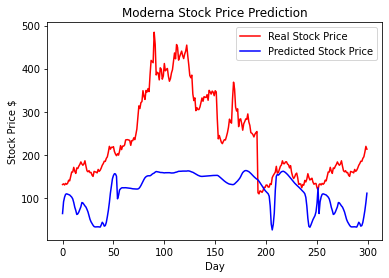

In [92]:
# Visualising the results
plt.plot(real_stock_price[60:360], color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Moderna Stock Price Prediction')
plt.xlabel('Day')
plt.ylabel('Stock Price $')
plt.legend()
plt.show()

In [93]:
predicted_x2=predicted_stock_price*2

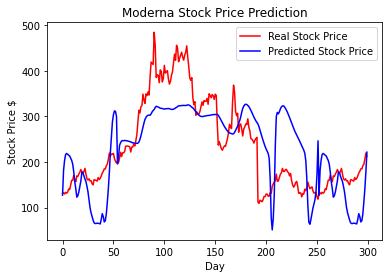

In [94]:
# Visualising the results
plt.plot(real_stock_price[60:360], color = 'red', label = 'Real Stock Price')
plt.plot(predicted_x2, color = 'blue', label = 'Predicted Stock Price')
plt.title('Moderna Stock Price Prediction')
plt.xlabel('Day')
plt.ylabel('Stock Price $')
plt.legend()
plt.show()